In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as snp
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [66]:
df_train=pd.read_csv('train1.csv')

In [4]:
df_train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [92]:
df_test=pd.read_csv('test1.csv')
df_test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [8]:
df_train.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,17892.000000,17892.000000,17892.000000,17892.000000,17892.000000
mean,13191.500000,26.287693,4.766191,325.207523,11.974737
std,7624.675152,22.935092,79.923261,3538.599684,174.346267
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6596.250000,13.145425,-71.516375,0.000000,0.000000
50%,13191.500000,32.985550,9.775000,0.000000,0.000000
75%,19786.750000,42.501575,64.688975,10.000000,0.000000
max,26382.000000,71.706900,174.886000,69176.000000,6820.000000


In [7]:
df_test.describe()

,ForecastId,Lat,Long
count,12212.000000,12212.000000,12212.000000
mean,6106.500000,26.287693,4.766191
std,3525.445078,22.935390,79.924300
min,1.000000,-41.454500,-157.498300
25%,3053.750000,13.145425,-71.516375
50%,6106.500000,32.985550,9.775000
75%,9159.250000,42.501575,64.688975
max,12212.000000,71.706900,174.886000


In [38]:
df_train.isnull().sum()

Id                   0
Province/State    9702
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
month                0
day                  0
dtype: int64

In [74]:
df_train['Province/State'].fillna('Unknown', inplace=True)

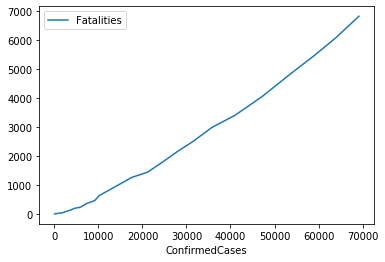

In [16]:
df_train[(df_train['Country/Region'] == 'Italy') & df_train['Fatalities'] != 0].plot(kind='line', x='ConfirmedCases', y='Fatalities')

In [17]:
df_train[df_train['ConfirmedCases'] == 9000]['Country/Region'].unique()

array(['Iran'], dtype=object)

In [18]:
filtered_data = df_train.groupby('Date').sum()
filtered_data

,Id,Lat,Long,ConfirmedCases,Fatalities
Date,,,,,
2020-01-22,3737582,7465.7049,1353.5983,539.0,17.0
2020-01-23,3737866,7465.7049,1353.5983,627.0,18.0
2020-01-24,3738150,7465.7049,1353.5983,901.0,25.0
2020-01-25,3738434,7465.7049,1353.5983,1347.0,41.0
2020-01-26,3738718,7465.7049,1353.5983,1959.0,53.0
...,...,...,...,...,...
2020-03-20,3754054,7465.7049,1353.5983,268110.0,11249.0
2020-03-21,3754338,7465.7049,1353.5983,300255.0,12920.0
2020-03-22,3754622,7465.7049,1353.5983,331467.0,14578.0


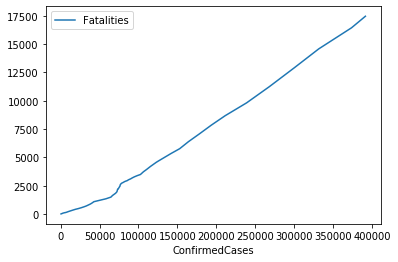

In [19]:
filtered_data.plot(kind='line', x='ConfirmedCases', y='Fatalities')

In [21]:
china_data = df_train[df_train['Country/Region'] == 'China'].groupby('Date').sum()

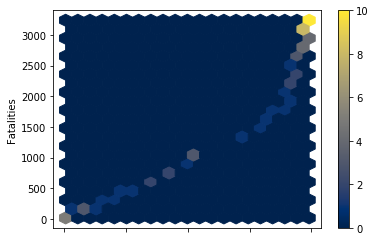

In [22]:
china_data.plot.hexbin(x='ConfirmedCases', y='Fatalities', gridsize=20, cmap='cividis')

In [11]:
df_date = df_train.groupby('Date')
df_date_sum = df_date.sum()
df_date_sum.drop('Id', axis=1,inplace=True)
df_date_sum.reset_index(inplace=True)
df_date_sum

,Date,Lat,Long,ConfirmedCases,Fatalities,month,day
0,2020-01-22,7465.7049,1353.5983,539.0,17.0,284,6248
1,2020-01-23,7465.7049,1353.5983,627.0,18.0,284,6532
2,2020-01-24,7465.7049,1353.5983,901.0,25.0,284,6816
3,2020-01-25,7465.7049,1353.5983,1347.0,41.0,284,7100
4,2020-01-26,7465.7049,1353.5983,1959.0,53.0,284,7384
...,...,...,...,...,...,...,...
58,2020-03-20,7465.7049,1353.5983,268110.0,11249.0,852,5680
59,2020-03-21,7465.7049,1353.5983,300255.0,12920.0,852,5964
60,2020-03-22,7465.7049,1353.5983,331467.0,14578.0,852,6248
61,2020-03-23,7465.7049,1353.5983,373583.0,16439.0,852,6532


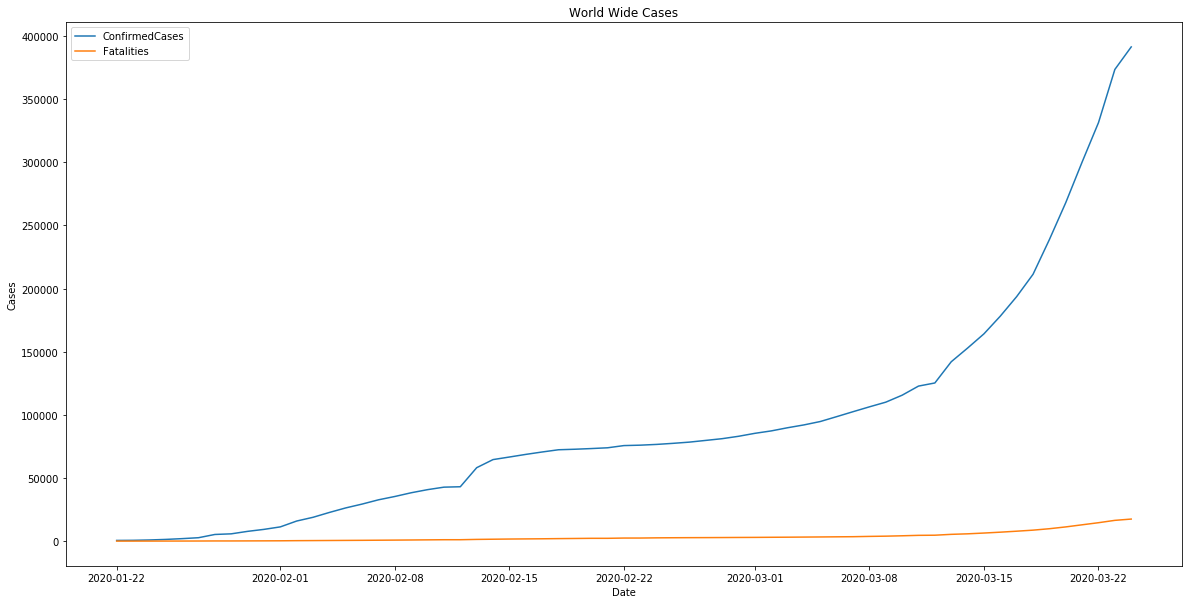

In [12]:
plt.figure(figsize=(20,10))
plt.plot('Date','ConfirmedCases',data=df_date_sum)
plt.plot('Date','Fatalities',data=df_date_sum)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('World Wide Cases')
plt.legend()

In [14]:
china_data =df_train[df_train["Country/Region"]=="China"]
china_data.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,month,day
2961,4372,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0,1,22
2962,4373,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0,1,23
2963,4374,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0,1,24
2964,4375,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0,1,25
2965,4376,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0,1,26


Text(0.5, 1.0, 'Cases in italy')

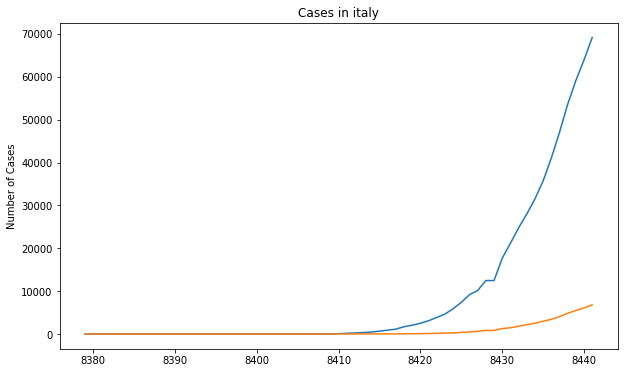

In [19]:
italy = df_train[df_train["Country/Region"]=="Italy"]
plt.figure(figsize=(10,6))
plt.plot(italy["ConfirmedCases"])
plt.plot(italy["Fatalities"])
plt.ylabel("Number of Cases")
plt.title('Cases in italy')

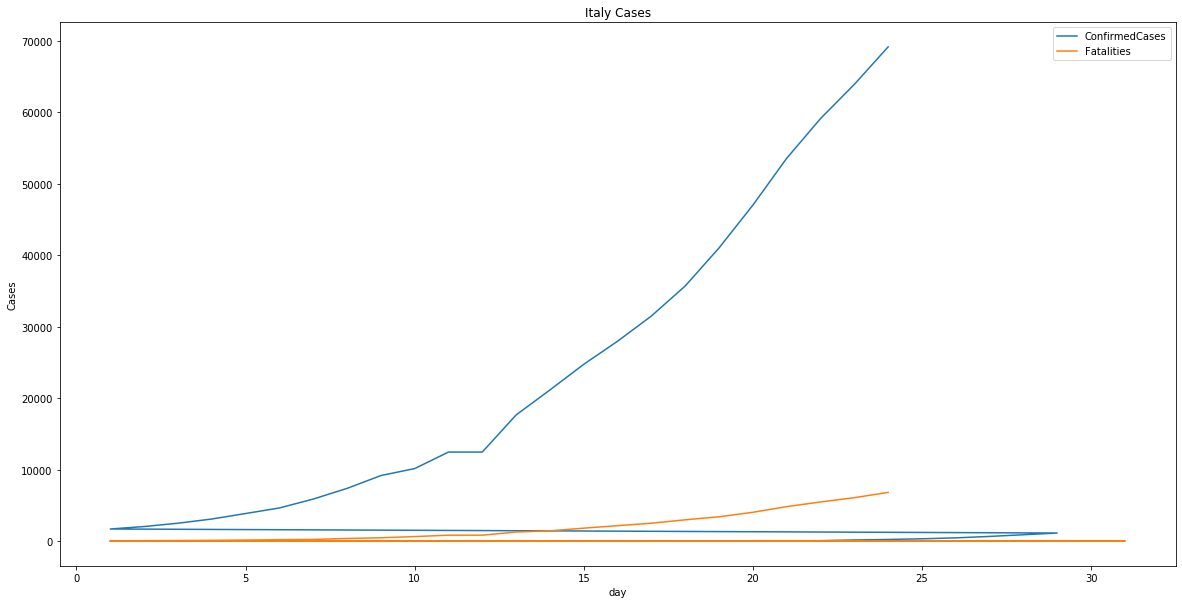

In [105]:
italy = df_train[df_train["Country/Region"]=="Italy"]
plt.figure(figsize=(20,10))
plt.plot('day','ConfirmedCases',data=italy)
plt.plot('day','Fatalities',data=italy)
plt.xlabel('day')
plt.ylabel('Cases')
plt.title('Italy Cases')
plt.legend()


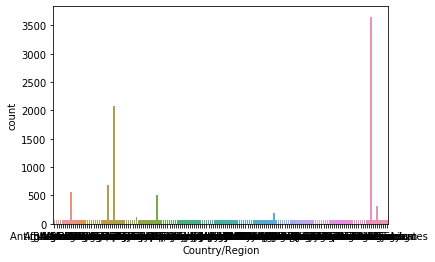

In [37]:
y=df_train['Country/Region']
ax=sns.countplot(y,label="count")

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,month,day
0,1,Unknown,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,1,22
1,2,Unknown,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,1,23
2,3,Unknown,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,1,24
3,4,Unknown,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,1,25
4,5,Unknown,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,1,26


In [68]:
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_train["month"] = df_train["Date"].dt.month
df_train['day'] = df_train['Date'].dt.day

In [89]:
df_train.drop('Date',axis=1,inplace=True)
df_train.head()

,Id,Province/State,Country/Region,Lat,Long,ConfirmedCases,Fatalities,month,day
0,1,Unknown,Afghanistan,33.0,65.0,0.0,0.0,1,22
1,2,Unknown,Afghanistan,33.0,65.0,0.0,0.0,1,23
2,3,Unknown,Afghanistan,33.0,65.0,0.0,0.0,1,24
3,4,Unknown,Afghanistan,33.0,65.0,0.0,0.0,1,25
4,5,Unknown,Afghanistan,33.0,65.0,0.0,0.0,1,26


In [93]:
df_test["Date"] = pd.to_datetime(df_test["Date"])
df_test["month"] = df_test["Date"].dt.month
df_test['day'] = df_test['Date'].dt.day

In [94]:
df_test.drop('Date',axis=1,inplace=True)

In [95]:
df_test['Province/State'].fillna('Unknown', inplace=True)

In [97]:
df_test

,ForecastId,Province/State,Country/Region,Lat,Long,month,day
0,1,Unknown,Afghanistan,33.0000,65.0000,3,12
1,2,Unknown,Afghanistan,33.0000,65.0000,3,13
2,3,Unknown,Afghanistan,33.0000,65.0000,3,14
3,4,Unknown,Afghanistan,33.0000,65.0000,3,15
4,5,Unknown,Afghanistan,33.0000,65.0000,3,16
...,...,...,...,...,...,...,...
12207,12208,Unknown,Zambia,-15.4167,28.2833,4,19
12208,12209,Unknown,Zambia,-15.4167,28.2833,4,20
12209,12210,Unknown,Zambia,-15.4167,28.2833,4,21
12210,12211,Unknown,Zambia,-15.4167,28.2833,4,22


In [75]:
y1_train = df_train.loc[:,'ConfirmedCases']
y2_train = df_train.loc[:,'Fatalities']

In [76]:
X_train = df_train.loc[:,['Province/State', 'Country/Region', 'month', 'day']]
X_train2 = df_train.loc[:,['month', 'day']]


In [77]:
X_test = df_test.loc[:,['Province/State', 'Country/Region', 'month', 'day']]
X_test2 = df_test.loc[:,['month', 'day']]


In [78]:
poly_cc = PolynomialFeatures(degree = 4) 
X_poly = poly_cc.fit_transform(X_train2) 
  
poly_cc.fit(X_poly, y1_train) 
lin_cc = LinearRegression() 
lin_cc.fit(X_poly, y1_train) 

predictions_cc_poly = lin_cc.predict(poly_cc.fit_transform(X_test2))
predictions_cc_poly

array([ 458.73004265,  492.64042916,  532.44381716, ..., 2104.11572826,
       1981.14319423, 1903.69680489])

In [80]:
X_train2.head()

,month,day
0,1,22
1,1,23
2,1,24
3,1,25
4,1,26


In [81]:
conf=X_test2

In [83]:
conf['confirmed']=predictions_cc_poly
conf.head()

,month,day,confirmed
0,3,12,458.730043
1,3,13,492.640429
2,3,14,532.443817
3,3,15,578.838620
4,3,16,632.550688


In [79]:
poly_f = PolynomialFeatures(degree = 4) 
X_poly = poly_f.fit_transform(X_train2) 
  
poly_f.fit(X_poly, y2_train) 
lin_f = LinearRegression() 
lin_f.fit(X_poly, y2_train) 

predictions_f_poly = lin_f.predict(poly_f.fit_transform(X_test2))
predictions_f_poly

array([ 16.84478636,  18.39792425,  20.25907696, ..., 131.63802551,
       125.42181621, 121.2969635 ])

In [84]:
fatal=X_test2


In [86]:
fatal['fatalities']=predictions_f_poly
conf.head()

,month,day,confirmed,fatalities
0,3,12,16.844786,16.844786
1,3,13,18.397924,18.397924
2,3,14,20.259077,20.259077
3,3,15,22.462148,22.462148
4,3,16,25.040871,25.040871


In [87]:
poly_cc = PolynomialFeatures(degree = 4) 
X_poly = poly_cc.fit_transform(X_train2) 
  
poly_cc.fit(X_poly, y1_train) 
lin_cc = LinearRegression() 
lin_cc.fit(X_poly, y1_train) 

predictions_c_poly = lin_cc.predict(poly_cc.fit_transform(X_train2))


array([4.16341883e+00, 1.15124257e+00, 1.05719906e+00, ...,
       1.15259046e+03, 1.28015198e+03, 1.42182533e+03])

In [98]:
X_train3= df_train.loc[:,'month']
X_test3= df_train.loc[:,'month']

In [100]:
poly_cc = PolynomialFeatures(degree = 4) 
#X_poly = poly_cc.fit_transform(X_train3) 
  
poly_cc.fit(X_train3, y1_train) 
lin_cc = LinearRegression() 
lin_cc.fit(X_train3, y1_train) 

predictions_cc_poly1 = lin_cc.predict(poly_cc.fit_transform(X_test3))
predictions_cc_poly1

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 ... 3 3 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.